The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean Ambient temperature (AT) C â€“6.23 37.10 17.71 Ambient pressure (AP) mbar 985.85 1036.56 1013.07 Ambient humidity (AH) (%) 24.08 100.20 77.87 Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 Turbine after temperature (TAT) C 511.04 550.61 546.16 Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 Turbine energy yield (TEY) MWH 100.02 179.50 133.51 Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

In [2]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [3]:
Data=pd.read_csv("gas_turbines.csv")
Data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
Data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
Data.isnull().value_counts()

AT     AP     AH     AFDP   GTEP   TIT    TAT    TEY    CDP    CO     NOX  
False  False  False  False  False  False  False  False  False  False  False    15039
dtype: int64

In [7]:
Data[Data.duplicated]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [8]:
A = Data[["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP", "CO", "NOX"]]
B = Data[["TEY"]]

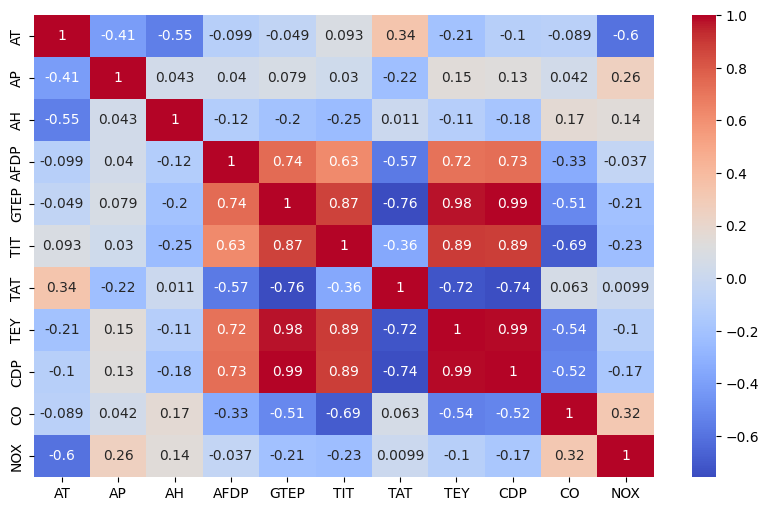

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')
plt.show()

Visualization of dataset

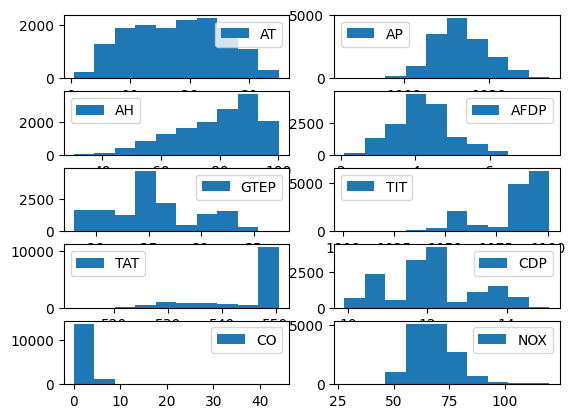

In [10]:
axs = plt.subplots(5, 2)[1].flatten()

for i, ax in enumerate(axs):
    ax.hist(A.iloc[:, i], label=A.columns[i])
    ax.legend()

plt.show()

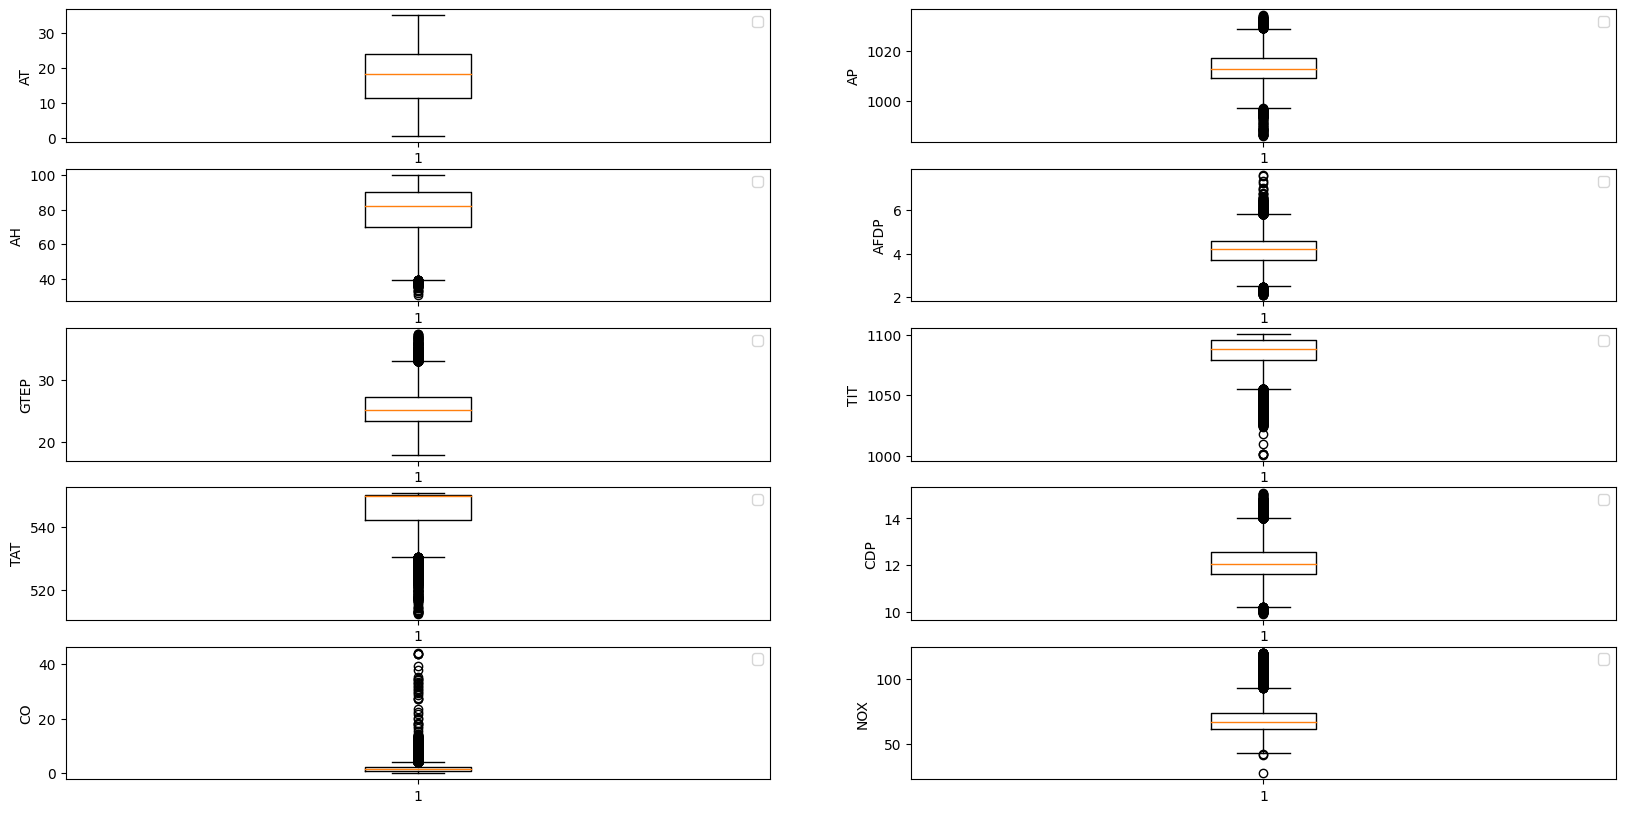

In [11]:
fig,axs = plt.subplots(5, 2,figsize=(20, 10))
axs = axs.ravel()
for i, ax in enumerate(axs):

    ax.boxplot(A.iloc[:, i])
    ax.set_ylabel(A.columns[i])
    ax.legend()

plt.show()

Standardization of features

In [12]:
scale=StandardScaler()
scaled_data=scale.fit_transform(Data)

In [13]:
scaled_data=pd.DataFrame(scaled_data,columns=Data.columns)
scaled_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [14]:
X =scaled_data[["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP", "CO", "NOX"]]
Y =scaled_data[["TEY"]]

In [15]:
X.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
5,-1.328821,-0.389864,0.984836,-0.890186,-1.374309,-1.452072,0.581427,-1.338295,0.663417,1.357951
6,-1.316898,-0.249470,0.932273,-0.882030,-1.380060,-1.439971,0.568715,-1.321978,0.681733,1.360911
7,-1.326959,-0.077878,0.886235,-0.909656,-1.376705,-1.452072,0.575071,-1.311100,0.734340,1.415351
8,-1.315921,0.093714,0.802715,-0.902683,-1.386049,-1.433920,0.596681,-1.321978,0.639836,1.346012
9,-1.278359,0.280906,0.686786,-0.182977,-0.482312,-0.048330,0.611936,-0.383764,-0.028981,1.393575


In [16]:
Y.head(10)

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909
4,-1.229909
5,-1.229909
6,-1.230541
7,-1.230541
8,-1.229909
9,-0.157207


Train Test Split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

Model Building

In [18]:
dropout_rate=0.2
activation_function = 'linear'
batch_size = 100
epochs = 100

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='linear'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(48 ,kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

adam = Adam(learning_rate =0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [20]:
scores=model.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: 1.0000 - mean_squared_error: 1.0000


In [21]:
history=model.fit(X_train,Y_train,batch_size=1000,epochs=1000,verbose=0,validation_data=(X_test, Y_test))

In [22]:
model.history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [23]:
scores=model.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016


In [24]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

mean_squared_error: 0.16%


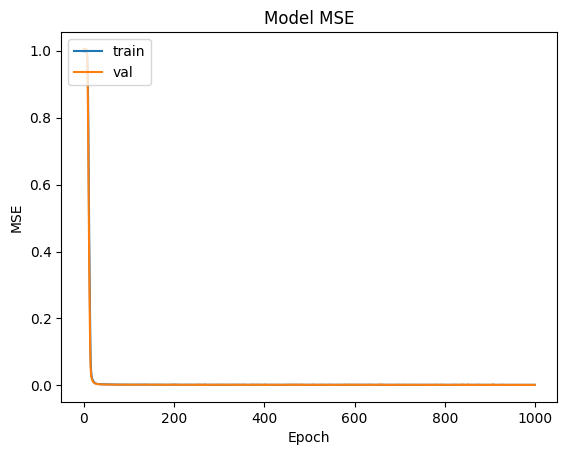

In [25]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model building by using Adam Optimizer

Hyper Parameter Tuning for Number of neurons and hidden layers and learning rate

Adam optimizer is best compared to other optimizers so letus go for adam optimizer.

Since, its a regession like problem we should use loss as mean_squared_error not binary_crossentropy

In [26]:
layers=[2,3,4,5,8]
neurons = [8,10,15,25,36,54]
learning_rates = np.linspace(0.001, 0.1, 10)

In [27]:
def create_model1(layers, neurons,learning_rate):
    model1 = Sequential()
    model1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))


    for i in range(layers-1):
        model1.add(Dense(neurons, activation='relu'))
        model1.add(Dense(1, activation='linear'))


    adam = Adam(learning_rate = learning_rate)
    model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model1

In [28]:
model1 = KerasClassifier(build_fn=create_model1, verbose=0)

<ipython-input-28-06473661806b>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn=create_model1, verbose=0)


In [29]:
parameters1=dict(layers=layers,neurons = neurons,learning_rate=learning_rates)

In [30]:
grid1 = RandomizedSearchCV(estimator=model1, param_distributions=parameters1, cv=3, n_iter=10,random_state=42)

In [31]:
grid_result1 = grid1.fit(X_train, Y_train)

In [32]:
print('Best : {}, using {}'.format(grid_result1.best_score_,grid_result1.best_params_))

Best : 0.00022163119865581393, using {'neurons': 54, 'learning_rate': 0.034, 'layers': 5}


Hyper parameter tuning for batch size and number of epochs

In [33]:
epochs=[10,20,50]
batch_size=[50,100,200]

In [34]:
def create_model2(epochs,batch_size):

    model2 = Sequential()
    model2.add(Dense(10, input_dim=X_train.shape[1], activation='relu',
                    kernel_initializer='uniform'))


    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))


    model2.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model2.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model2

In [35]:
model2 = KerasClassifier(build_fn=create_model2, verbose=0)

<ipython-input-35-0c0a41208284>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model2, verbose=0)


In [36]:
parameters2=dict(epochs=epochs,batch_size=batch_size)

In [37]:
grid2 = GridSearchCV(estimator=model2, param_grid=parameters2, cv=KFold(),verbose=10)

In [38]:
grid_result2 = grid2.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=50, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   7.0s
[CV 2/5; 1/9] START batch_size=50, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   4.3s
[CV 3/5; 1/9] START batch_size=50, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=50, epochs=10;, score=0.001 total time=   7.0s
[CV 4/5; 1/9] START batch_size=50, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   4.4s
[CV 5/5; 1/9] START batch_size=50, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   4.3s
[CV 1/5; 2/9] START batch_size=50, epochs=20....................................
[CV 1/5; 2/9] END .....batch_size=50, epochs=20;,

In [39]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))

Best : 0.00011080332333222032, using {'batch_size': 50, 'epochs': 10}


In [40]:
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 50}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 50}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 50}


Hyper parameter tuning for Drop rate

In [41]:
dropout_rate = [0.1,0.2]

In [42]:
def create_model3(dropout_rate):

    model3 = Sequential()
    model3.add(Dense(10, input_dim=X_train.shape[1], activation='relu',
                    kernel_initializer='uniform'))


    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))


    model3.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model3.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model3

In [43]:
model3 = KerasClassifier(build_fn = create_model3,epochs=10,batch_size=50,verbose = 0)

<ipython-input-43-170ab2db251c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn = create_model3,epochs=10,batch_size=50,verbose = 0)


In [44]:
paramgrids3=dict(dropout_rate = dropout_rate)

In [45]:
grid3= GridSearchCV(estimator = model3,param_grid = paramgrids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START dropout_rate=0.1............................................
[CV 1/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   5.4s
[CV 2/5; 1/2] START dropout_rate=0.1............................................
[CV 2/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   7.1s
[CV 3/5; 1/2] START dropout_rate=0.1............................................
[CV 3/5; 1/2] END .............dropout_rate=0.1;, score=0.001 total time=   7.1s
[CV 4/5; 1/2] START dropout_rate=0.1............................................
[CV 4/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   6.0s
[CV 5/5; 1/2] START dropout_rate=0.1............................................
[CV 5/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   5.1s
[CV 1/5; 2/2] START dropout_rate=0.2............................................
[CV 1/5; 2/2] END .............dropout_rate=0.2;,

In [46]:
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))

Best : 0.00011080332333222032, using {'dropout_rate': 0.1}


In [47]:
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

0.00011080332333222032,0.00022160664666444067 with {'dropout_rate': 0.1}
0.00011080332333222032,0.00022160664666444067 with {'dropout_rate': 0.2}


Hyperparameter Tuning for Activation Function and Kernel Initializer

In [48]:
activation= ['relu', 'tanh', 'sigmoid','linear']
init = ['uniform','normal','zero']

In [49]:
param_grids4 = dict(activation=activation,kernel_initializer=init)

In [50]:
dropout_rate=0.1
learning_rate= 0.034
layers=5
neurons=54
epochs=10
batch_size=50

In [51]:
def create_model4(activation,kernel_initializer):

    dropout_rate=0.1
    model4 = Sequential()
    model4.add(Dense(10, input_dim=X_train.shape[1], activation=activation,
                    kernel_initializer=kernel_initializer))


    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))

    model4.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model4.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model4

In [52]:
model4 = KerasClassifier(build_fn = create_model4,epochs=10,batch_size=50,verbose = 0)

<ipython-input-52-d97a5654709e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model4 = KerasClassifier(build_fn = create_model4,epochs=10,batch_size=50,verbose = 0)


In [53]:
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 1/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   7.3s
[CV 2/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 2/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   5.1s
[CV 3/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 3/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.001 total time=   7.1s
[CV 4/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 4/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   7.0s
[CV 5/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 5/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   8.6s
[CV 1/5; 2/12] START activation=relu, kernel_initializ

In [54]:
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))

Best : 0.00011080332333222032, using {'activation': 'relu', 'kernel_initializer': 'uniform'}


In [55]:
means4 = grid_result4.cv_results_["mean_test_score"]
stds4 = grid_result4.cv_results_["std_test_score"]
params4 = grid_result4.cv_results_["params"]
for mean4,stdev4,param4 in zip(means4,stds4,params4):
  print("{},{} with {}".format(mean4,stdev4,param4))

0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.000221606646664

Final Model

In [56]:
dropout_rate=0.1
learning_rate= 0.034
layers=5
neurons=54
kernel_initializer='uniform'
activation='relu'
epochs=10
batch_size=50

In [57]:
dropout_rate=0.1
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation=activation,
                    kernel_initializer=kernel_initializer))

model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))

model.add(Dense(1, activation='linear',kernel_initializer='uniform'))

adam = Adam(learning_rate =0.034)
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])

Train the model and store the history

In [58]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=50, validation_data=(X_test, Y_test))

Epoch 1/10
181/181 [==============================] - 3s 5ms/step - loss: 0.5125 - mean_squared_error: 0.5125 - accuracy: 0.0000e+00 - val_loss: 0.0144 - val_mean_squared_error: 0.0144 - val_accuracy: 0.0000e+00
Epoch 2/10
181/181 [==============================] - 1s 4ms/step - loss: 0.0385 - mean_squared_error: 0.0385 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_mean_squared_error: 0.0038 - val_accuracy: 0.0000e+00
Epoch 3/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_mean_squared_error: 0.0095 - val_accuracy: 0.0000e+00
Epoch 4/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0279 - mean_squared_error: 0.0279 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_mean_squared_error: 0.0035 - val_accuracy: 0.0000e+00
Epoch 5/10
181/181 [==============================] - 1s 4ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0056 

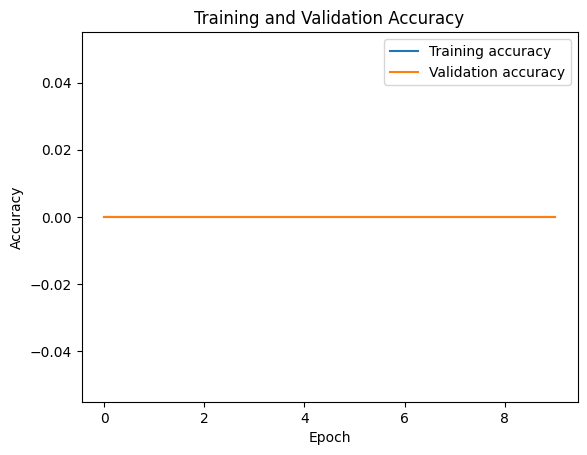

In [59]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

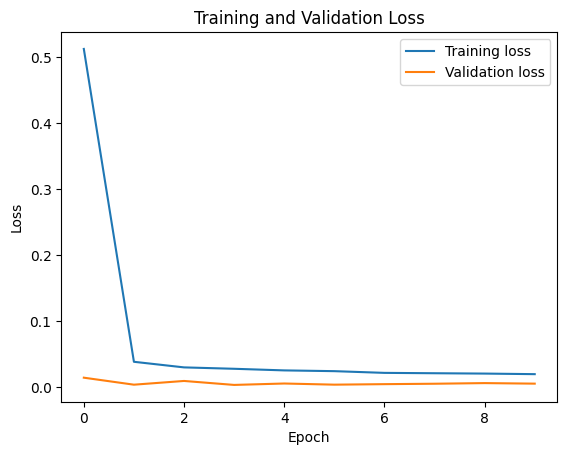

In [60]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Visualization

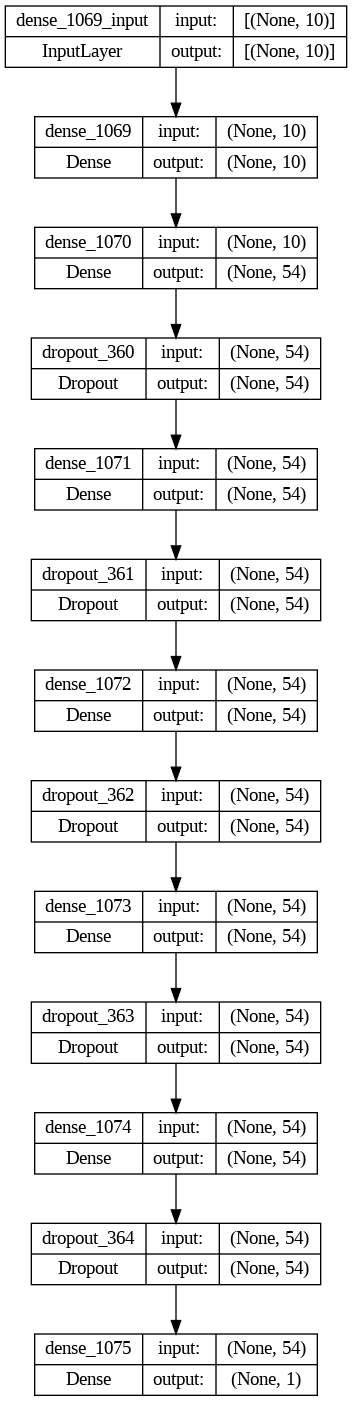

In [61]:
from keras.utils import plot_model
plot_model(model, to_file='modelf.png', show_shapes=True)

Conclusion:

By tuning each parameters batchwise saperately we got our model parameters. So, by different visualization method we can see that the loss is reducing.